In [17]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("./"))
import matplotlib.pyplot as plt

['.git', '.ipynb_checkpoints', 'LICENSE', 'model.h5', 'model1.h5', 'README.md', 'requirements.txt', 'sample.ipynb', 'sisrec_project.yml', 'test', 'Training_set']


In [2]:
print(os.listdir("./Training_set/Training_set"))

['electric bus', 'electric car']


In [3]:
import keras 
from keras.preprocessing import image
from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2

Using TensorFlow backend.


In [4]:
datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True)
batch_size = 100

In [5]:
path = "./Training_set/Training_set"
train_generator = datagen.flow_from_directory(path,batch_size = batch_size,target_size =(150,150),class_mode = 'binary')

Found 1486 images belonging to 2 classes.


In [6]:
from keras import layers
from keras import models

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = (2,2),activation = 'relu',padding = "same",strides = (2,2),input_shape = (150,150,3)))
model.add(keras.layers.Conv2D(64,kernel_size = (4,4),activation = 'relu',padding = "same",strides = (2,2)))
model.add(keras.layers.Conv2D(64,kernel_size = (2,2),activation = 'relu',strides = (2,2)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128,kernel_size = (4,4),activation = 'relu',padding = "same",strides = (2,2)))
model.add(keras.layers.Conv2D(128,kernel_size = (2,2),activation = 'relu',strides = (2,2)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(loss = "binary_crossentropy",optimizer = 'Adam',metrics = ['accuracy'])

In [ ]:
# if want to continue train
# train_generator = model.load('model.h5')

In [9]:
model.fit_generator(train_generator,steps_per_epoch = 50, epochs = 15)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
50/50 [==============================] - 18s 362ms/step - loss: 0.5058 - accuracy: 0.7523
Epoch 2/15
50/50 [==============================] - 14s 271ms/step - loss: 0.3624 - accuracy: 0.8459
Epoch 3/15
50/50 [==============================] - 15s 294ms/step - loss: 0.2512 - accuracy: 0.8947
Epoch 4/15
50/50 [==============================] - 15s 308ms/step - loss: 0.1606 - accuracy: 0.9373
Epoch 5/15
50/50 [==============================] - 14s 282ms/step - loss: 0.1059 - accuracy: 0.9610
Epoch 6/15
50/50 [==============================] - 13s 260ms/step - loss: 0.0608 - accuracy: 0.9804
Epoch 7/15
50/50 [==============================] - 13s 261ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 8/15
50/50 [==============================] - 13s 257ms/step - loss: 0.0165 - accuracy: 0.9960
Epoch 9/15
50/50 [==============================] - 13s 260ms/step - loss: 0.0200 - accuracy: 0.9929
Epoch 10/15
50/50 [========================

In [10]:
model.save('model.h5')

In [11]:
path = "./test/test"
test_generator = datagen.flow_from_directory(path,target_size = (150,150),class_mode = 'binary',batch_size = batch_size)

Found 382 images belonging to 2 classes.


In [12]:
model.evaluate_generator(test_generator,verbose = 1,steps = len(test_generator))

4/4 [==============================] - 2s 392ms/step


[0.5028069019317627, 0.8795811533927917]

In [13]:
model.metrics_names

['loss', 'accuracy']

In [15]:
res = model.predict_generator(test_generator,steps=None)

In [21]:
print(res[0]*10)

[0.00014395]


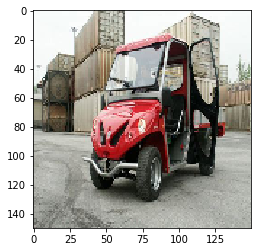

BUS


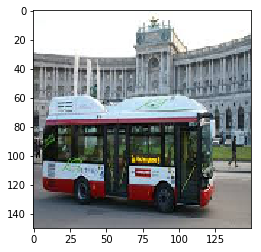

BUS


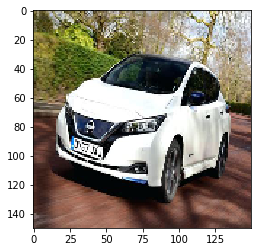

CAR


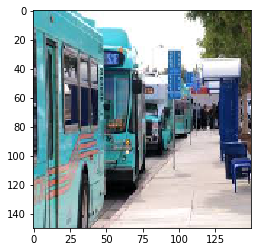

CAR


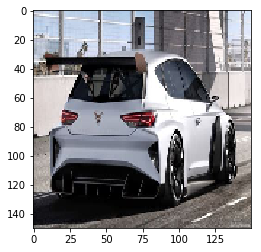

CAR


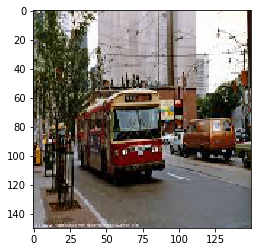

BUS


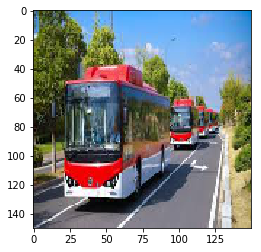

BUS


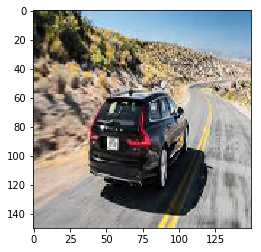

BUS


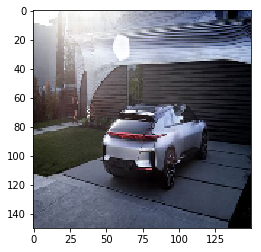

CAR


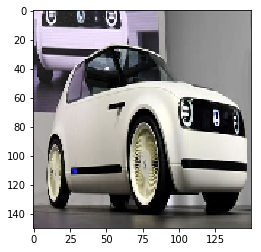

BUS


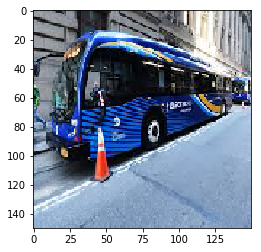

BUS


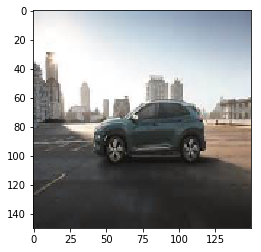

CAR


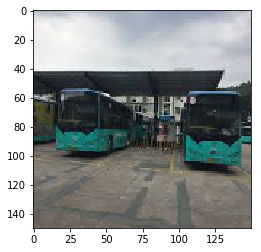

CAR


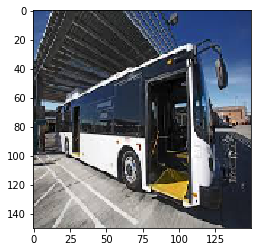

CAR


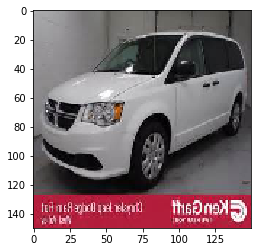

CAR


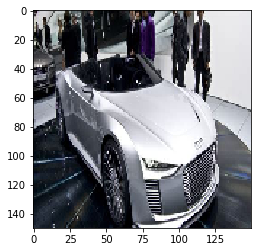

CAR


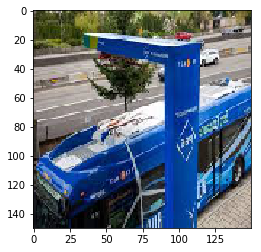

BUS


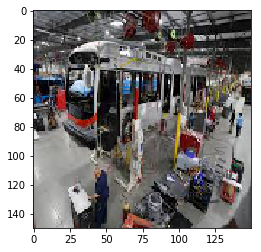

BUS


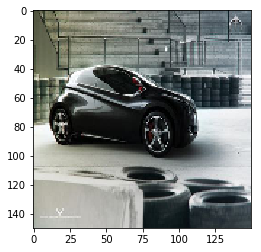

CAR


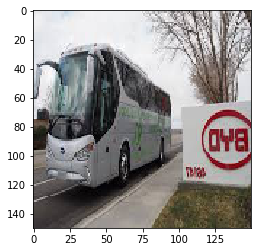

CAR


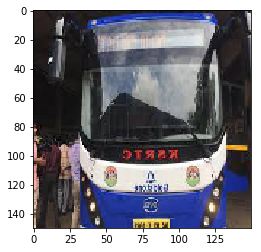

BUS


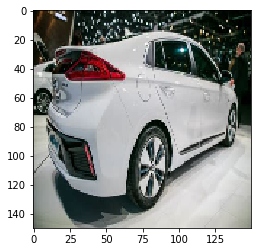

CAR


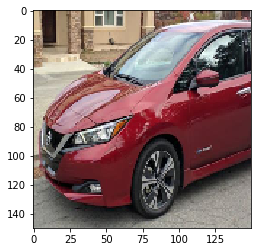

BUS


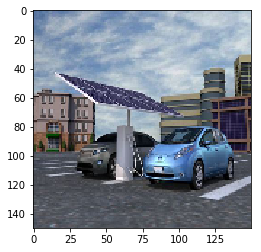

BUS


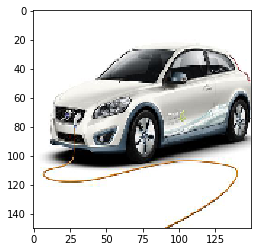

BUS


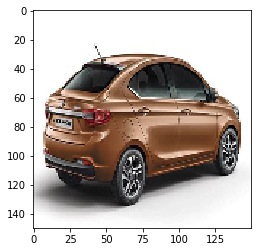

BUS


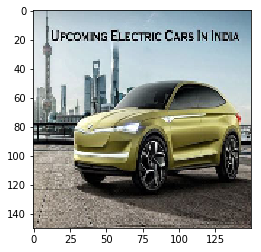

BUS


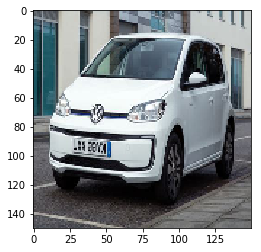

BUS


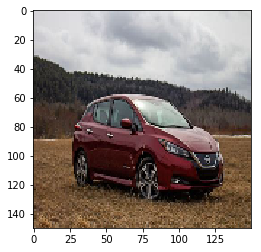

CAR


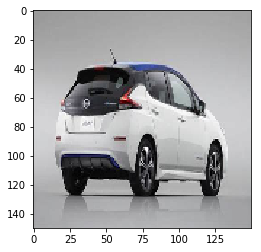

CAR


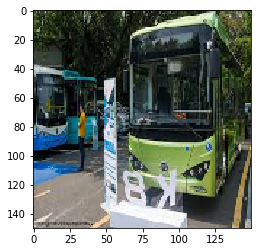

CAR


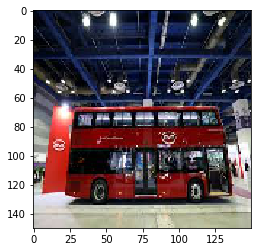

BUS


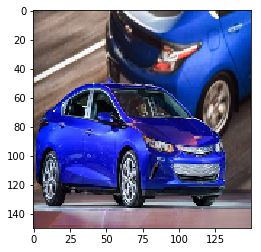

CAR


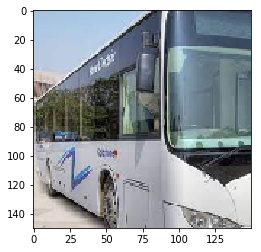

BUS


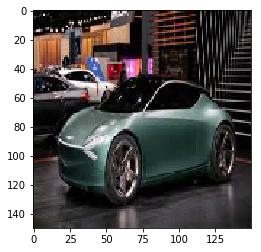

BUS


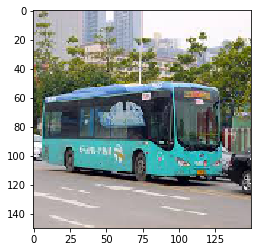

CAR


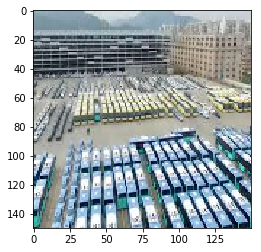

BUS


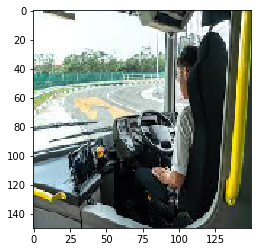

CAR


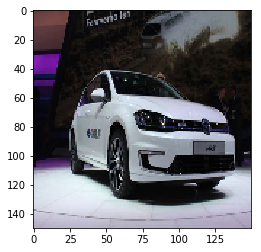

CAR


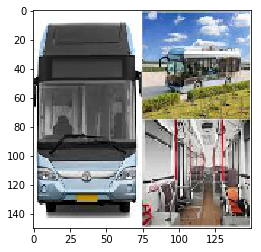

CAR


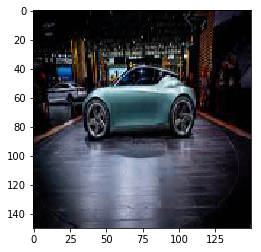

BUS


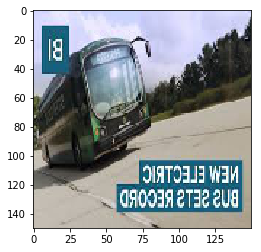

CAR


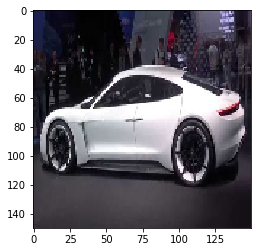

BUS


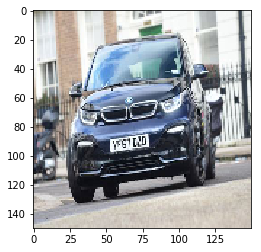

BUS


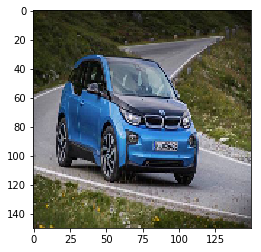

BUS


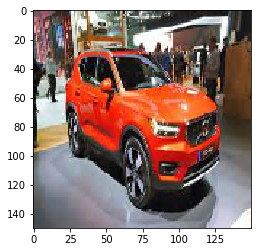

BUS


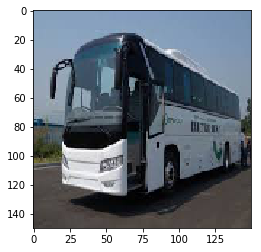

BUS


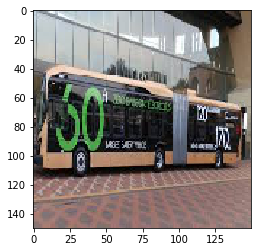

CAR


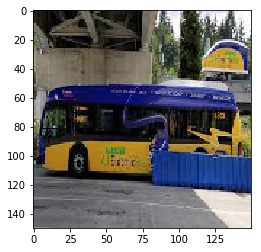

CAR


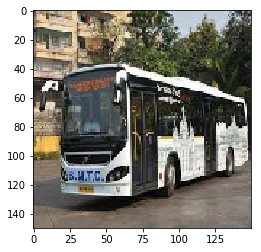

CAR


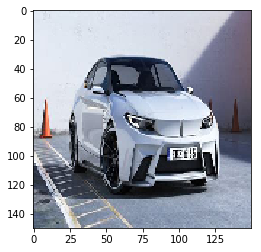

CAR


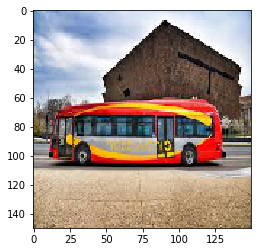

BUS


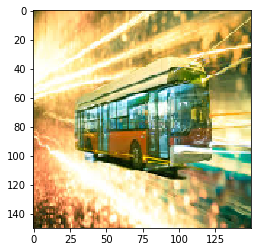

BUS


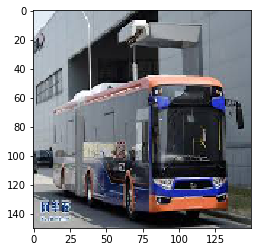

CAR


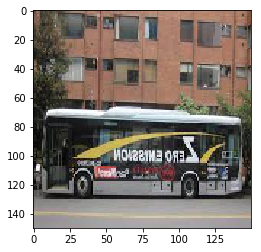

CAR


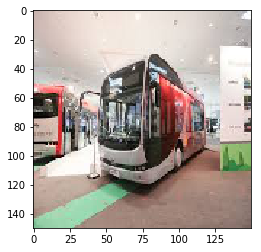

BUS


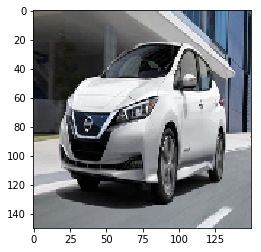

CAR


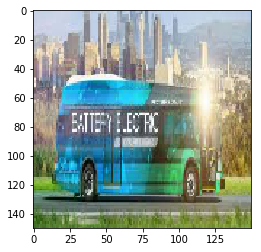

CAR


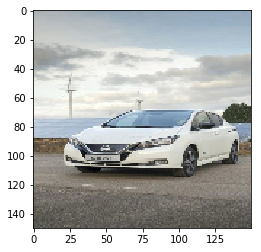

BUS


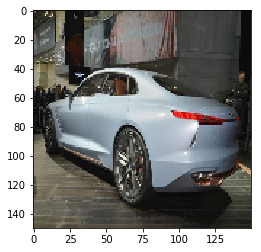

BUS


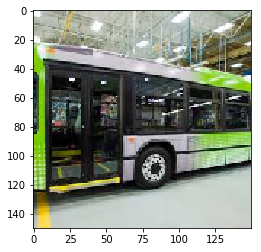

CAR


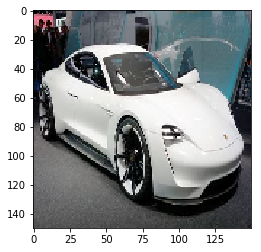

BUS


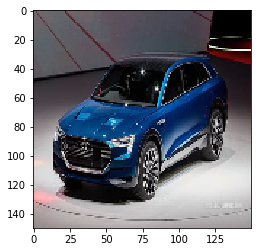

CAR


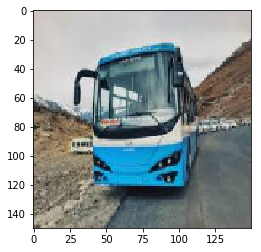

BUS


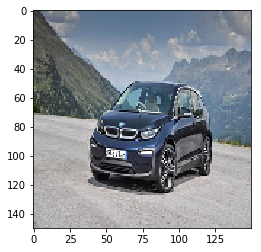

BUS


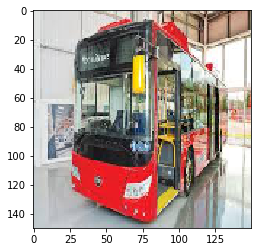

CAR


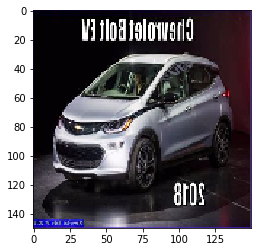

CAR


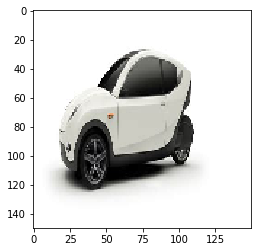

BUS


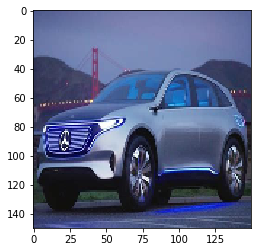

CAR


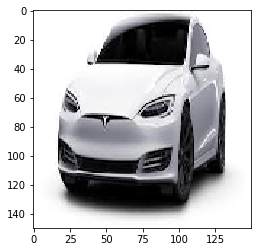

BUS


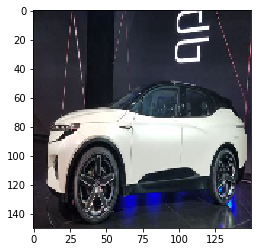

CAR


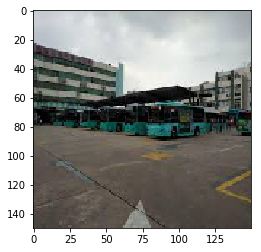

CAR


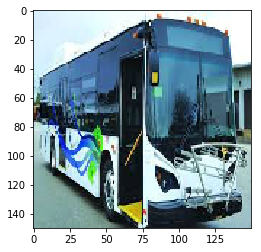

CAR


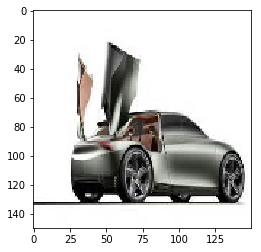

BUS


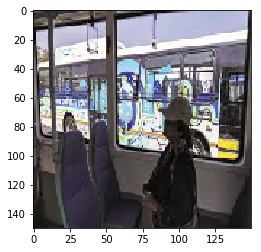

BUS


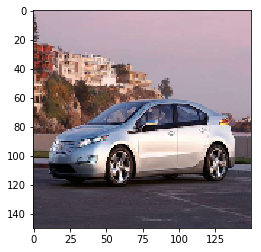

BUS


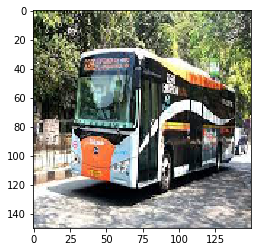

CAR


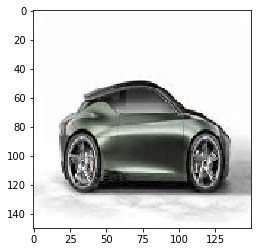

CAR


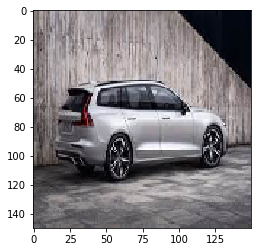

BUS


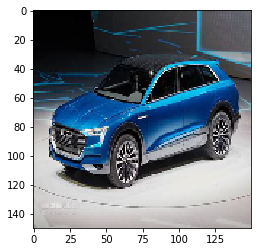

BUS


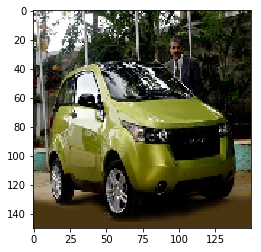

CAR


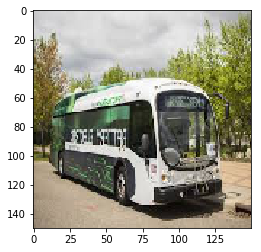

BUS


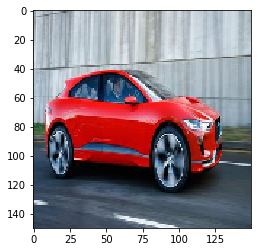

BUS


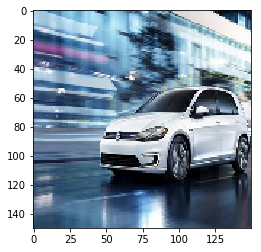

BUS


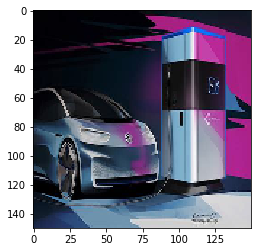

CAR


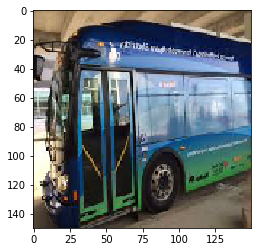

BUS


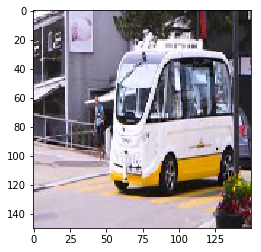

CAR


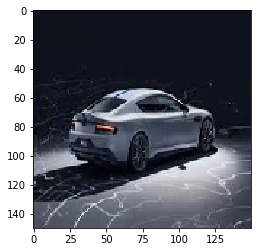

CAR


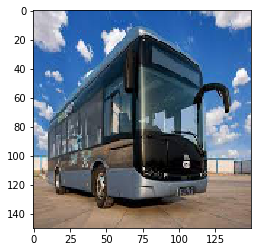

CAR


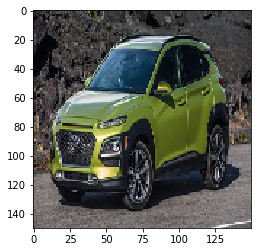

CAR


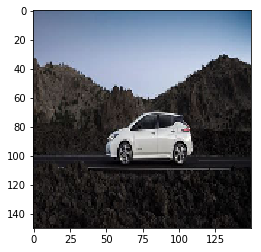

CAR


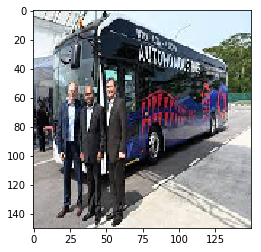

CAR


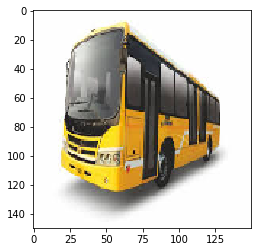

BUS


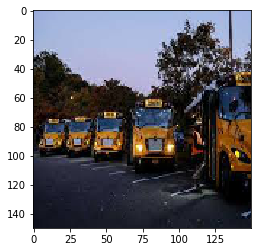

BUS


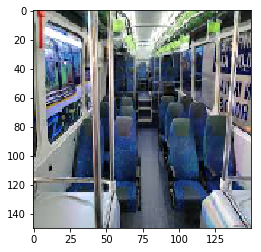

CAR


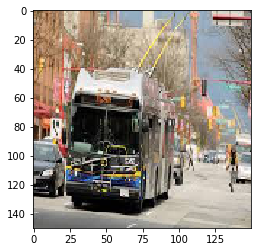

BUS


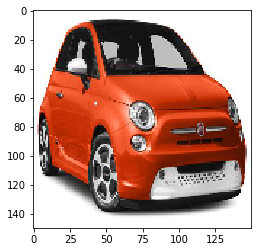

CAR


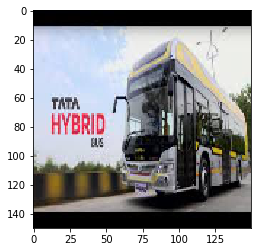

BUS


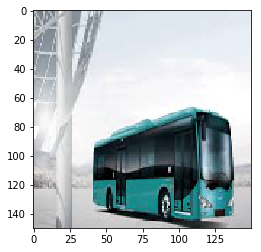

BUS


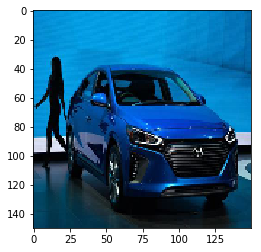

BUS


IndexError: index 100 is out of bounds for axis 0 with size 100

In [18]:
print(res)
for i in range(len(res)):
    plt.imshow(test_generator[0][0][i])
    plt.show()
    if (res[i][0] >= 0.5):
        print("CAR")
    else:
        print("BUS")